<a href="https://colab.research.google.com/github/alexferreira28/CLASSIFICADOR-DE-NOTICIAS-FALSAS/blob/main/CLASSIFICADOR_NOTICIAS_FALSAS_TCC_II_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#TCC2

!pip install openpyxl
!pip install unidecode

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 4.3 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import re
import unidecode
import nltk
import nltk.corpus
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer #vetoriza usando TF-IDF
from google.colab import files
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer # Import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [3]:
nltk.download('stopwords')

# baixando os stopwords
stopwords_br = nltk.corpus.stopwords.words('portuguese')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
#tem que baixar pra funcionar a lematização
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
#Baixando o arquivo

In [5]:
uploaded = files.upload()

Saving PolitifactBR.xlsx to PolitifactBR.xlsx


In [6]:
dataFrame = pd.read_excel('PolitifactBR.xlsx')
dataFrame.head()
#print(dataFrame)

,Titulo,Subtitulo,Noticia,Categoria,Data,Autor,URL,Classe,origin,url,publisher_name,publisher_site,date
0,"Após aglomeração na Libertadores, Palmeiras x ...",NaN,criticar liberar entrar maracanã convidar libe...,política,14/04/2021 10h50,14/04/2021 10h50,https://www.uol.com.br/esporte/futebol/colunas...,1,NaN,NaN,NaN,NaN,NaN
1,Freixo defende entrada do PSOL em bloco de Mai...,NaN,o deputar federal marcelo freixo psol-rj defen...,política,21/12/2020 18h25,21/12/2020 18h25,https://noticias.uol.com.br/colunas/leonardo-s...,1,NaN,NaN,NaN,NaN,NaN
2,\n\nMoro vai demitir 180 petistas que ganham m...,Boato – Bolsonaro passou o Coaf para o futuro ...,bolsonaro passar o coaf pro morar demitir peti...,política,10/12/2018,\nEdgard Matsuki,https://www.boatos.org/politica/moro-demitir-1...,0,NaN,NaN,NaN,NaN,NaN
3,É falso que o TSE atualizou apuração baseado e...,NaN,o tse fornecer informação apuração o site notí...,política,2020/11/20,Comprova,https://projetocomprova.com.br/publicações/e-f...,0,NaN,NaN,NaN,NaN,NaN
4,vídeo mostrar fraudar ocorrido urna eletrônica...,"desde o início da tarde de hoje (29), circula ...",único publicação twitter vídeo obter visualiza...,política,29/11/2020,marco faustino,https://www.e-farsas.com/video-nao-mostra-frau...,0,NaN,NaN,NaN,NaN,NaN


In [8]:
#eliminando as colunas desnecessarias
dataFrameFK = dataFrame[['Noticia', 'Classe']]

In [9]:
dataFrameFK.head()

,Noticia,Classe
0,criticar liberar entrar maracanã convidar libe...,1
1,o deputar federal marcelo freixo psol-rj defen...,1
2,bolsonaro passar o coaf pro morar demitir peti...,0
3,o tse fornecer informação apuração o site notí...,0
4,único publicação twitter vídeo obter visualiza...,0


In [11]:
#Remoçao de instancias com valores faltantes
dataFrameFK = dataFrameFK.dropna()

In [12]:
#Ver quantas valores estao duplicados
dataFrameFK.duplicated().sum()

np.int64(11)

In [13]:
#Remoção de duplicatas
dataFrameFK = dataFrameFK.drop_duplicates()

In [14]:
#Aplicar unidecode à coluna 'Noticia'
dataFrameFK['Noticia'] = dataFrameFK['Noticia'].apply(unidecode.unidecode)
# Remova pontuação e caracteres especiais da coluna 'Noticia'
dataFrameFK['Noticia'] = dataFrameFK['Noticia'].str.replace(r'[^\w\s]', '', regex=True)

print(dataFrameFK['Noticia'])

0       criticar liberar entrar maracana convidar libe...
1       o deputar federal marcelo freixo psolrj defend...
2       bolsonaro passar o coaf pro morar demitir peti...
3       o tse fornecer informacao apuracao o site noti...
4       unico publicacao twitter video obter visualiza...
                              ...                        
8313    Rui Rio diz que a carga fiscal esta no nivel m...
8314    Rui Rio diz que os quatro primeiros candidatos...
8315    Miguel Sousa Tavares esta certo sobre a greve ...
8316    Antonio Costa destaca que hoje ha mais 386 mil...
8317    Rui Rio Professor no topo da carreira ganha a ...
Name: Noticia, Length: 8307, dtype: object


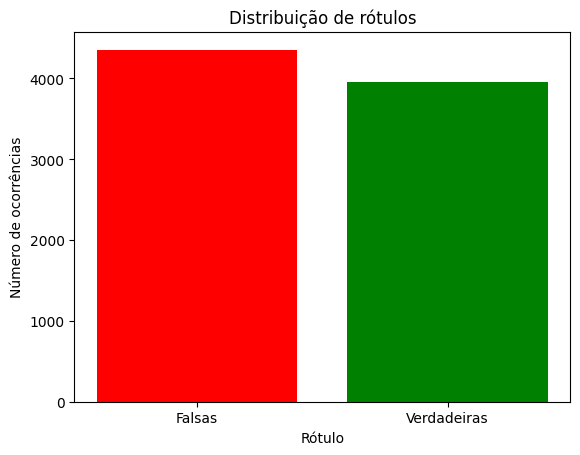

In [15]:
# Ter uma vizualização dos dados
# Conta o número de ocorrências de cada rótulo
label_count = dataFrameFK.Classe.value_counts()
 # cor
cores = ['red', 'green']

# Cria um gráfico de barras usando a Matplotlib
plt.bar(label_count.index, label_count,  color=cores)

# Define o título do gráfico
plt.title('Distribuição de rótulos')

# Define o nome do eixo x do gráfico
plt.xlabel('Rótulo')

# Define o nome do eixo y do gráfico
plt.ylabel('Número de ocorrências')

# Mostrar os rótulos corretamente no eixo x
plt.xticks([0, 1], ['Falsas', 'Verdadeiras'])

# Exibe o gráfico
plt.show()

In [16]:
print("Total de rótulos Fake:", 100 * label_count[0] / (label_count[0] + label_count[1]))
print("Total de rótulos Real:", 100 * label_count[1] / (label_count[0] + label_count[1]))

# há um desbalanceamento aqui, que pode ser tratado com sobreamostragem, subamostragem dentre outras
# técnicas

Total de rótulos Fake: 52.437703141928495
Total de rótulos Real: 47.562296858071505


In [17]:
news = dataFrameFK.Noticia
labes = dataFrameFK.Classe

print(labes.value_counts())

Classe
0    4356
1    3951
Name: count, dtype: int64


In [18]:
#Normalização
# Convertendo todas as letras para minúsculas
dataFrameFK.Noticia = dataFrameFK.Noticia.str.lower()
print(dataFrameFK.Noticia)

0       criticar liberar entrar maracana convidar libe...
1       o deputar federal marcelo freixo psolrj defend...
2       bolsonaro passar o coaf pro morar demitir peti...
3       o tse fornecer informacao apuracao o site noti...
4       unico publicacao twitter video obter visualiza...
                              ...                        
8313    rui rio diz que a carga fiscal esta no nivel m...
8314    rui rio diz que os quatro primeiros candidatos...
8315    miguel sousa tavares esta certo sobre a greve ...
8316    antonio costa destaca que hoje ha mais 386 mil...
8317    rui rio professor no topo da carreira ganha a ...
Name: Noticia, Length: 8307, dtype: object


In [19]:
dataFrameFK['news'] = dataFrameFK['Noticia'] # Criando coluna 'notícias' do 'Noticia'

#Remove as palavras de parada (stop words) de cada notícia
dataFrameFK['news_no_stopwords'] = dataFrameFK['news'].apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords_br]))

dataFrameFK['news_no_stopwords']

,news_no_stopwords
0,criticar liberar entrar maracana convidar libe...
1,deputar federal marcelo freixo psolrj defender...
2,bolsonaro passar coaf pro morar demitir petist...
3,tse fornecer informacao apuracao site noticia ...
4,unico publicacao twitter video obter visualiza...
...,...
8313,rui rio diz carga fiscal nivel elevado sempre ...
8314,rui rio diz quatro primeiros candidatos ps eur...
8315,miguel sousa tavares certo sobre greve juizes
8316,antonio costa destaca hoje ha 386 mil pessoas ...


In [20]:
#total de palavras ANTES das stopwords
dataFrameFK['news'].str.split().apply(len)

,news
0,84
1,84
2,48
3,29
4,7
...,...
8313,19
8314,21
8315,10
8316,17


In [21]:
#total de palavras DEPOIS das stopwords
dataFrameFK['news_no_stopwords'].str.split().apply(len)

,news_no_stopwords
0,68
1,69
2,37
3,21
4,7
...,...
8313,11
8314,14
8315,7
8316,12


In [22]:
# (LEMATIZAÇÃO)Reduz as palavras em cada notícia para sua forma canônica (lemmatization)
lemmatizer = WordNetLemmatizer()
dataFrameFK['news_lemmatized'] = dataFrameFK['news_no_stopwords'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

In [25]:
# Separa o conjunto de dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(dataFrameFK['news_lemmatized'], dataFrameFK['Classe'], test_size=0.2)

In [26]:
# Vetoriza os dados de texto usando o TF-IDF
tfidf_vectorizer = TfidfVectorizer()
train_features = tfidf_vectorizer.fit_transform(X_train)
test_features = tfidf_vectorizer.transform(X_test)

In [28]:
# Cria um modelo de classificação Naive Bayes Multinomial e o treina com os dados de treinamento
clf = MultinomialNB()
clf.fit(train_features, y_train)

# Avalia a acurácia do modelo nos dados de treino
accuracy = clf.score(train_features, y_train)
print("Acurácia:", accuracy)

Acurácia: 0.8722347629796839


In [29]:
# Avalia a acurácia do modelo nos dados de teste
accuracy = clf.score(test_features, y_test)
print("Acurácia:", accuracy)

Acurácia: 0.7316486161251504


In [31]:
# Faz a predição no conjunto de teste
y_pred = clf.predict(test_features)

# calcula as métricas de classificação
report = classification_report(y_test, y_pred, target_names=['Fake', 'Real'])

# imprime o relatório
print(report)

              precision    recall  f1-score   support

        Fake       0.70      0.82      0.75       832
        Real       0.78      0.64      0.70       830

    accuracy                           0.73      1662
   macro avg       0.74      0.73      0.73      1662
weighted avg       0.74      0.73      0.73      1662

